<a href="https://colab.research.google.com/github/BriacLEGUILLOU/Impact_score/blob/master/Impact_score_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option('display.max_rows', 20)

In [2]:
col_CR_complet = pd.read_csv('https://raw.githubusercontent.com/BriacLEGUILLOU/Impact_score/master/col_CR_complet.csv')

def obtention_exp10(nb):
  """ Permet de convertir un nombre de la façon suivante :
  1e6 -> 6
  - 1e6 -> -6 """
  signe = np.sign(nb)
  nb = np.absolute(nb)
  if nb == 0:
    return 0
  else :
    return math.exp(nb * math.log(10)) * signe

print(obtention_exp10(6))

1000000.0000000013


In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
# Chargement des données
# L'utilisateur peut sélectionner la catégories APE souhaitée
# Il est nécessaire d'avoir accès au dossier 'Export données par catégorie' de Briac
ape_cat0 = '03'
data_log10 = pd.read_excel('/content/gdrive/My Drive/Impact Score/Export données par catégorie/data{}.xlsx'.format(ape_cat0), index_col=0) # donnée logarithmic
data = pd.concat([data_log10.iloc[:,0],data_log10.iloc[:,1:69].applymap(obtention_exp10), data_log10.iloc[:,69:-1]], axis=1) # donnée réelle

In [20]:
# Chargement de toutes les données
df_log10 = pd.DataFrame()
for j in ['0' + str(i) for i in range(0,10)]+ [str(i) for i in list(range(10,97))]:
  data_log10 = pd.read_excel('/content/gdrive/My Drive/Impact Score/Export données par catégorie/data{}.xlsx'.format(j), index_col=0)
  df_log10 = pd.concat([df_log10, data_log10], axis=0)
  print(j,  'df_log10:', df_log10.shape), 'data_log10: ', data_log10.shape)
data = pd.concat([df_log10.iloc[:,0],df_log10.iloc[:,1:69].applymap(obtention_exp10), df_log10.iloc[:,69:-1]], axis=1) # donnée réelle
data.shape

00 data_log10:  (2253, 83) df_log10: (2253, 83)
01 data_log10:  (8806, 83) df_log10: (11059, 83)
02 data_log10:  (1377, 83) df_log10: (12436, 83)
03 data_log10:  (679, 83) df_log10: (13115, 83)
04 data_log10:  (0, 83) df_log10: (13115, 83)
05 data_log10:  (3, 83) df_log10: (13118, 83)
06 data_log10:  (247, 83) df_log10: (13365, 83)
07 data_log10:  (70, 83) df_log10: (13435, 83)
08 data_log10:  (1892, 83) df_log10: (15327, 83)
09 data_log10:  (149, 83) df_log10: (15476, 83)
10 data_log10:  (17386, 83) df_log10: (32862, 83)
11 data_log10:  (2648, 83) df_log10: (35510, 83)
12 data_log10:  (10, 83) df_log10: (35520, 83)
13 data_log10:  (2163, 83) df_log10: (37683, 83)
14 data_log10:  (1918, 83) df_log10: (39601, 83)
15 data_log10:  (790, 83) df_log10: (40391, 83)
16 data_log10:  (4025, 83) df_log10: (44416, 83)
17 data_log10:  (1671, 83) df_log10: (46087, 83)
18 data_log10:  (5232, 83) df_log10: (51319, 83)
19 data_log10:  (102, 83) df_log10: (51421, 83)
20 data_log10:  (3282, 83) df_log10

,year,"Autres impôts, taxes et versements assimilés",Ventes de marchandises,Production vendue biens,Production vendue services,Chiffres d’affaires nets,Production stockée,Production immobilisée,Subventions d’exploitation,"Reprises sur amortissements et provisions, transfert de charges",Autres produits,Total des produits d’exploitation,Achats de marchandises (y compris droits de douane),Variation de stock (marchandises),Achats de matières premières et autres approvisionnements,Variation de stock (matières premières et approvisionnements),Autres achats et charges externes,"Impôts, taxes et versements assimilés",Salaires et traitements,Charges sociales,Autres charges,Total des charges d’exploitation,Résultat d'exploitation,Bénéfice attribué ou perte transférée,Perte supportée ou bénéfice transféré,Produits financiers de participations,Produits des autres valeurs mobilières et créances de l’actif immobilisé,Autres intérêts et produits assimilés,Reprises sur provisions et transferts de charges financier,Différences positives de change,Produits nets sur cessions de valeurs mobilières de placement,Total des produits financiers,Dotations financières sur amortissements et provisions,Intérêts et charges assimilées,Différences négatives de change,Charges nettes sur cessions de valeurs mobilières de placement,Total des charges financières,Résultat financier,Résultat en cours avant impôts,Produits exceptionnels sur opérations de gestion,...,Charges exceptionnelles sur opérations de gestion,Charges exceptionnelles sur opérations en capital,Dotations exceptionnelles aux amortissements et provisions,Total des charges exceptionnelles,Résultat exceptionnel,Participation des salariés aux résultats de l’entreprise,Impôts sur les bénéfices,Total des produits,Total des charges,Bénéfices ou perte (Total des produits ‐ Total des charges),Impôts différés (compte de résultat),Résultat net des sociétés mises en équivalence,Résultat net des entreprises intégrées,Résultat Groupe (Résultat net consolidé),Part des intérêts minoritaires (Résultat hors groupe),Résultat net part du groupe (part de la société mère),Rémunération d’intermédiaires et honoraires (hors rétrocessions),"Location, charges locatives et de copropriété",Effectif moyen du personnel,Sous‐traitance,Personnel extérieur à l’entreprise,"Rétrocessions d’honoraires, commissions et courtages",Taxe professionnelle,Montant de la TVA. collectée,Total TVA. déductible sur biens et services,Dividendes,siren,denomination,enthic,postal_code,town,optimisation_fiscale,ape,ape_name,len,ape_cat0,ape_cat1,ape_cat2,ape_cat3,ape_cat4
1802,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431364,3.110926,NaN,3.093422,NaN,3.407901,-3.407901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.407901,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.407901,-3.407901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422040790,BOYER-NARDON CONSULTING,1672,92500,RUEIL MALMAISON,False,0,Inconnu,4,0,0,0,NaN,NaN
1803,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.431364,3.110926,NaN,3.093422,NaN,3.407901,-3.407901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.407901,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.407901,-3.407901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422040790,BOYER-NARDON CONSULTING,1672,92500,RUEIL MALMAISON,False,0,Inconnu,4,0,0,0,NaN,NaN
2104,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.851258,NaN,NaN,NaN,1.851258,-1.851258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.851258,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.851258,-1.851258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433645694,NEGOCE COM,1672,75010,PARIS,False,0,Inconnu,4,0,0,0,NaN,NaN
4509,2012,NaN,NaN,NaN,5.087732,5.087732,NaN,4.823663,NaN,2.840733,1.954243,5.278292,NaN,-4.074195,5.024248,NaN,4.875958,3.471878,4.436290,3.740126,1.698970,5.425126,-4.882820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Calcul de l'impact score

In [5]:
colonnes_essentielles = col_CR_complet.loc[col_CR_complet['Compte annuel complet']\
                   .isin(['Bénéfices ou perte (Total des produits ‐ Total des charges)',\
                          'Résultat d\'exploitation',
                          'Participation des salariés aux résultats de l’entreprise',
                          'Impôts sur les bénéfices',
                          'Résultat exceptionnel',
                          'Résultat financier',
                          'Salaires et traitements',
                          'Charges sociales',
                          'Subventions d’exploitation',
                          'Impôts, taxes et versements assimilés',
                          'Total des charges d’exploitation',
                          'Chiffres d’affaires nets']),:]
colonnes_essentielles

,Unnamed: 0,Compte annuel complet,liasse Compte annuel complet
4,4,Chiffres d’affaires nets,FJ
7,7,Subventions d’exploitation,FO
16,16,"Impôts, taxes et versements assimilés",FX
17,17,Salaires et traitements,FY
18,18,Charges sociales,FZ
20,20,Total des charges d’exploitation,GF
21,21,Résultat d'exploitation,GG
36,36,Résultat financier,GV
46,46,Résultat exceptionnel,HI
47,47,Participation des salariés aux résultats de l’...,HJ


In [6]:
# Calcul du taux de remplissage des données
data['transparency score'] = 1 - data.loc[:,colonnes_essentielles['Compte annuel complet']].isna().sum(axis=1)/len(colonnes_essentielles)*0.5 - \
                            data.loc[:,col_CR_complet['Compte annuel complet']].isna().sum(axis=1)/len(col_CR_complet)*0.5
data['transparency score']

6570       0.424020
6571       0.325980
6572       0.254902
6573       0.318627
6574       0.303922
             ...   
1263954    0.176471
1263988    0.198529
1270288    0.507353
1271118    0.007353
1272131    0.007353
Name: transparency score, Length: 679, dtype: float64

In [7]:
# Calcul du partage du résultat d'exploitation avec les salarié⋅es et l'état
def obtention_score_global(row):
  """ Calcul du partage du résultat d'exploitation avec les salarié⋅es et l'état """
  # L'entreprise paye des impôts et/ou de la participation ?
  if (row['Impôts sur les bénéfices'] + row['Participation des salariés aux résultats de l’entreprise']) >= 0 :
    if (row['Résultat financier'] + row['Résultat exceptionnel'] < 0):
     # Si l'entreprise ne gagne pas d'argent via ses résultats financier et exceptionnel
      if (row['Impôts sur les bénéfices'] + row['Participation des salariés aux résultats de l’entreprise']) < 10 * row['Résultat d\'exploitation']:
         # impot ou participation déclarée pas trop importante par rapport aux gains de l'entreprise, sinon ça peut être une erreur
        return (row['Impôts sur les bénéfices'] + row['Participation des salariés aux résultats de l’entreprise']) / row['Résultat d\'exploitation']
    else :
      # l'entreprise gagne de l'argent via ses résultats financier et exceptionnel
      if (row['Impôts sur les bénéfices'] + row['Participation des salariés aux résultats de l’entreprise']) < 10 * row['Impôts sur les bénéfices']:
        return (row['Impôts sur les bénéfices'] + row['Participation des salariés aux résultats de l’entreprise']) / row['Bénéfices ou perte (Total des produits ‐ Total des charges)']

data['share score'] = data.apply(obtention_score_global, axis=1)
data['share score'].describe()

count    1.000000
mean     0.874922
std           NaN
min      0.874922
25%      0.874922
50%      0.874922
75%      0.874922
max      0.874922
Name: share score, dtype: float64

In [8]:
# Calcul de la proportion de charge provenant de l'économie réelle de l'entreprise
def obtention_score_cout_economique(row):
  """ Calcul de la proportion de charge provenant de l'économie réelle de l'entreprise """
  return (row['Salaires et traitements'] + row['Charges sociales'] + row['Impôts, taxes et versements assimilés'] - row['Subventions d’exploitation']) / row['Total des charges d’exploitation']

data['real economy score'] = data.apply(obtention_score_cout_economique, axis=1)
data['real economy score'].describe()

count    219.000000
mean       0.309621
std        0.159925
min       -0.199643
25%        0.203546
50%        0.309446
75%        0.411667
max        1.073004
Name: real economy score, dtype: float64

 # Disjonction des cas pour les entreprises

In [32]:
def disjonction_des_cas(row):
  """ Renvoie la catégorisation de l'entreprise """

  if row['Impôts, taxes et versements assimilés'] + row['Participation des salariés aux résultats de l’entreprise'] > 0:
    # L'entreprise paye des impôts
    if row['Résultat financier'] + row['Résultat exceptionnel'] > 0:
      # L'entreprise gagne de l'argent via son résultat financier et son résultat exceptionnel
      return 'Impôts_participation {}, ResFinancier+ResExceptionnel {}'.format('>0', '>0')
    elif row['Résultat financier'] + row['Résultat exceptionnel'] < 0:
      # L'entreprise perd de l'argent via son résultat financier et son résultat exceptionnel
      return 'Impôts_participation {}, ResFinancier+ResExceptionnel {}'.format('>0', '<0')
  elif row['Impôts, taxes et versements assimilés'] + row['Participation des salariés aux résultats de l’entreprise'] < 0:
    # L'entreprise ne paye pas d'impôts
    if row['Résultat financier'] + row['Résultat exceptionnel'] > 0:
      # L'entreprise gagne de l'argent via son résultat financier et son résultat exceptionnel
      return 'Impôts_participation {}, ResFinancier+ResExceptionnel {}'.format('<0', '>0')
    else:
      # L'entreprise perd de l'argent via son résultat financier et son résultat exceptionnel
      return 'Impôts_participation {}, ResFinancier+ResExceptionnel {}'.format('<0', '<0')
  

data['Disjonction_des_cas'] = data.apply(disjonction_des_cas, axis=1)
data['Disjonction_des_cas'].value_counts()

Impôts_participation >0, ResFinancier+ResExceptionnel >0    21115
Impôts_participation >0, ResFinancier+ResExceptionnel <0    18490
Impôts_participation <0, ResFinancier+ResExceptionnel <0      231
Impôts_participation <0, ResFinancier+ResExceptionnel >0      112
Name: Disjonction_des_cas, dtype: int64

In [93]:
# tableau de contingence entre les catégories des entreprises et les cas des entreprises
df_cat = pd.crosstab(data['ape_cat0'],data['Disjonction_des_cas'])

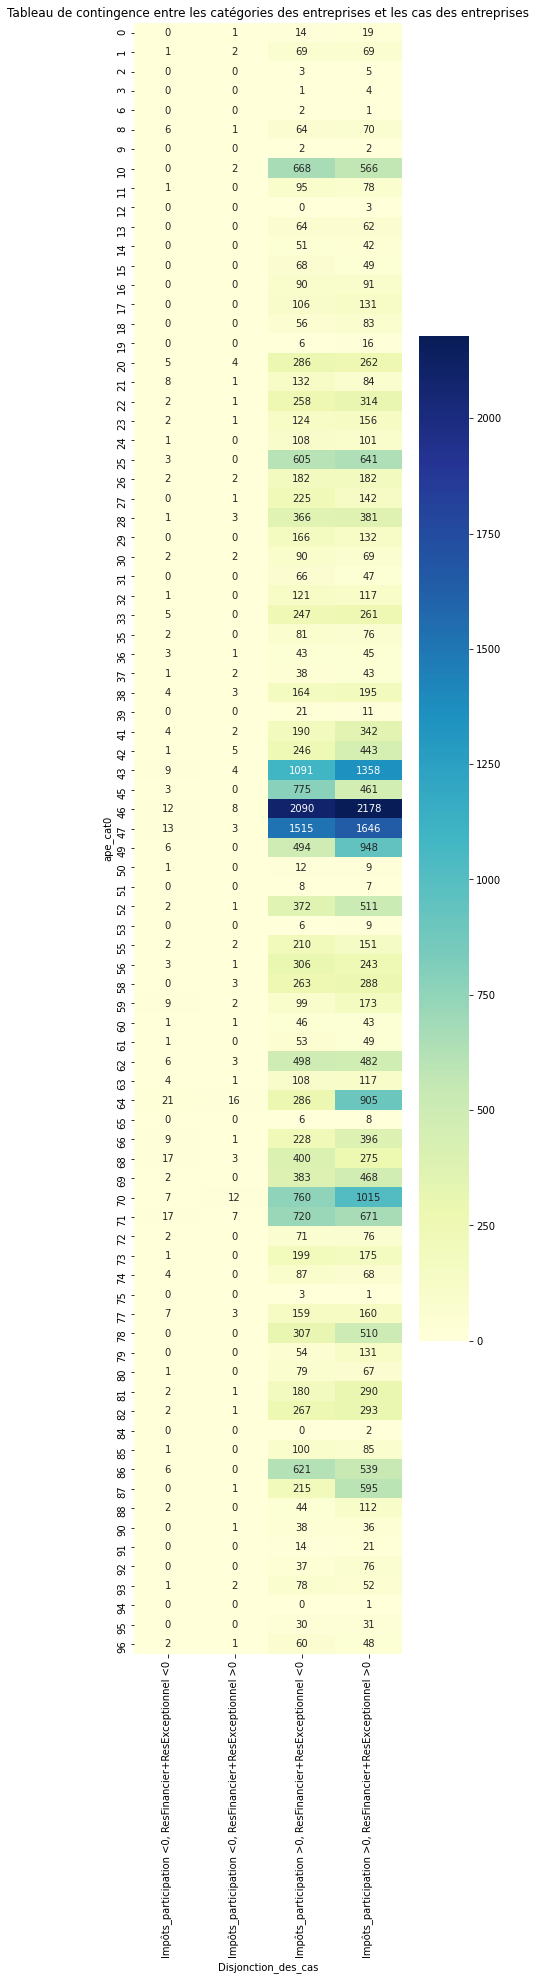

In [92]:
plt.figure(figsize=(6,30))
plt.title('Tableau de contingence entre les catégories des entreprises et les cas des entreprises')
sns.heatmap(pd.crosstab(data['ape_cat0'],data['Disjonction_des_cas']), annot=True, fmt="d", cmap="YlGnBu")